### K-medias

Clasificar las muestras siguientes utilizando $k=2$:

$[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]$

In [1]:
import numpy as np
np.set_printoptions(legacy='1.25')
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [2]:
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
C = np.array([[8,10],[3,10.5]])

In [3]:
np.sqrt((C[0,0] - C[1,0])**2 + (C[0,1] - C[1,1])**2)

5.024937810560445

In [4]:
np.linalg.norm(C[0] - C[1])

5.024937810560445

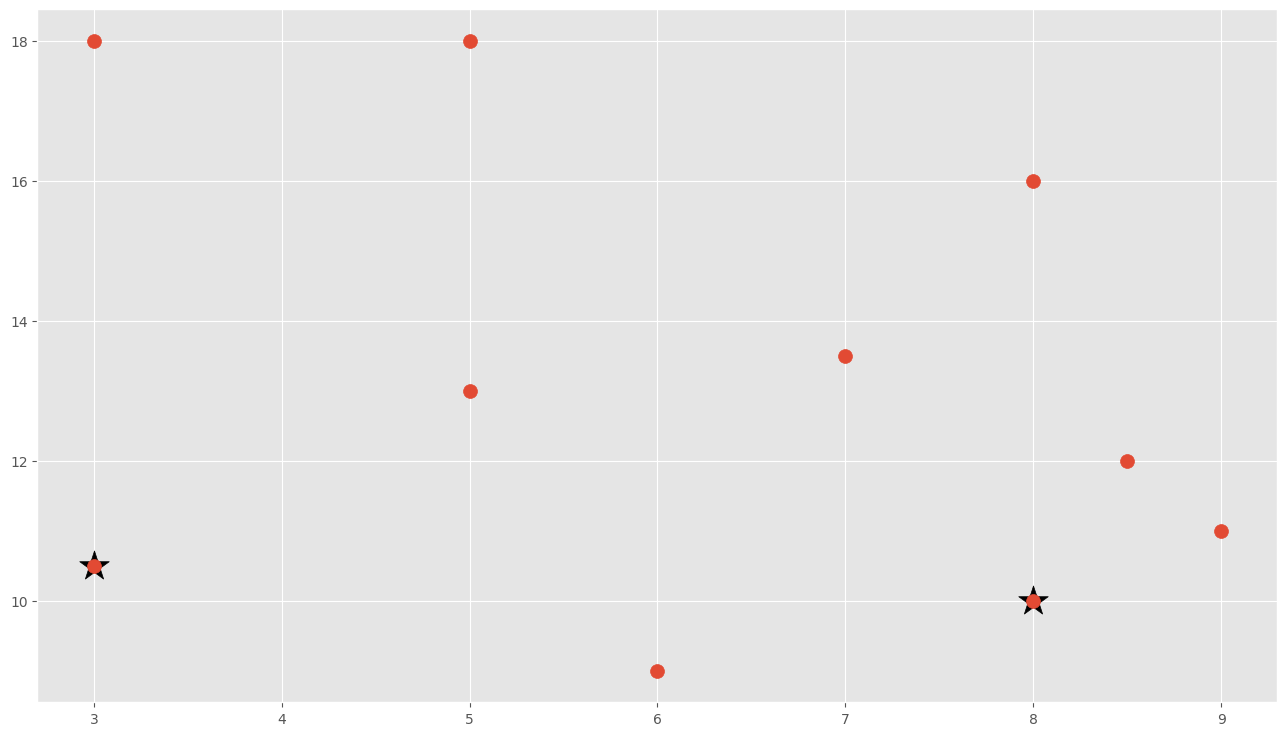

In [5]:
# Gráfica
plt.scatter(C[:,0], C[:,1], marker = '*', s = 500, c = 'k')
plt.scatter(data[:,0], data[:,1], s = 100)
plt.show()

In [6]:
distances = []
clusters = []

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Grupos
for i in range(len(data)):
    distance = dist(data[i], C) # Distancia del punto actual a las k-medias
    distances.append(distance)
    cluster = np.argmin(distance) # Grupo al que pertenece
    clusters.append(cluster)

print(clusters, '\n', np.array(distances))

[0, 1, 0, 1, 1, 0, 0, 1, 0, 0] 
 [[0.         5.02493781]
 [5.02493781 0.        ]
 [3.64005494 5.        ]
 [8.54400375 7.76208735]
 [4.24264069 3.20156212]
 [2.23606798 3.35410197]
 [1.41421356 6.02079729]
 [9.43398113 7.5       ]
 [2.06155281 5.70087713]
 [6.         7.43303437]]


In [7]:
# Recalcular centroides
for i in range(len(C)):
    points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
    # print(points )
    C[i] = np.mean(points, axis=0)
C

array([[ 7.75      , 11.91666667],
       [ 4.        , 14.875     ]])

In [8]:
clusters

[0, 1, 0, 1, 1, 0, 0, 1, 0, 0]

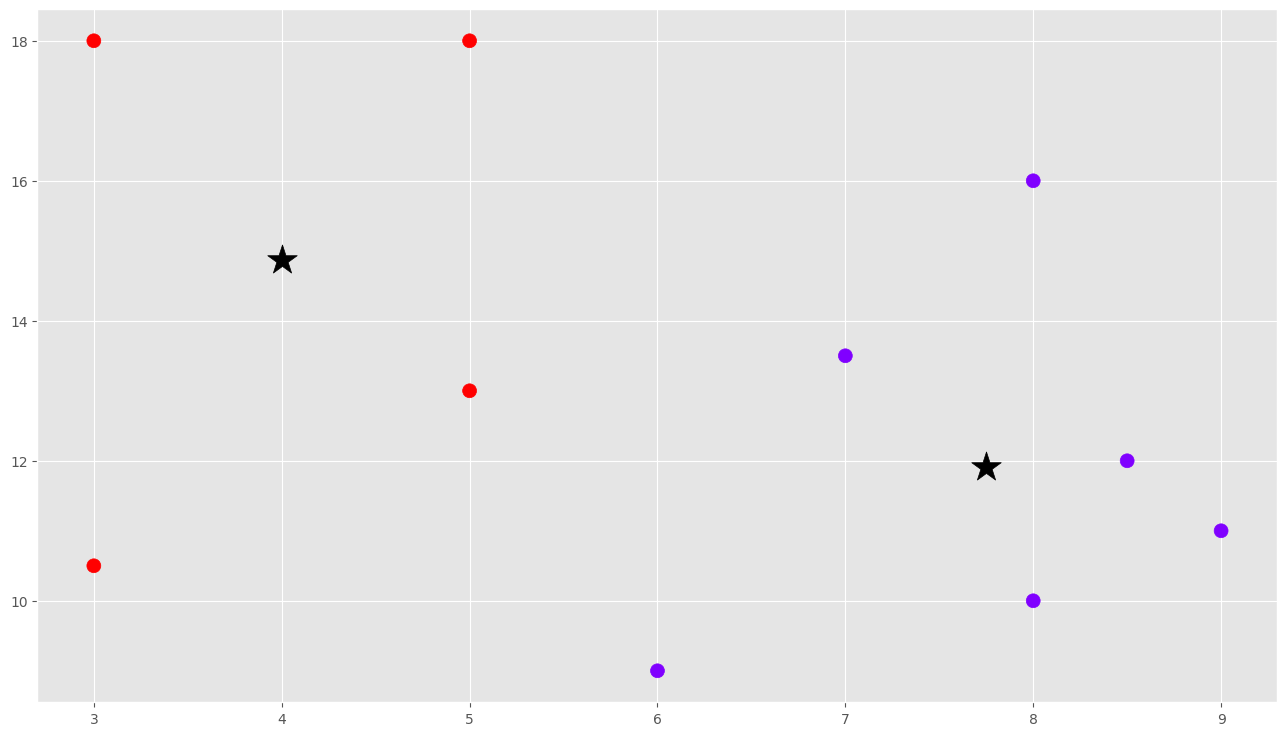

In [9]:
# Gráfica
plt.scatter(C[:,0], C[:,1], marker = '*', s = 500, c = 'k')
plt.scatter(data[:,0], data[:,1], s = 100, c=clusters, cmap='rainbow')
plt.show()

### Ejemplo con Sklearn

#### Exploratory data analysis

In [10]:
import pandas as pd

In [11]:
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [12]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/refs/heads/master/csv/cluster/xclara.csv'
data = pd.read_csv(url)
print(data.shape)
data.head()

(3000, 3)


,rownames,V1,V2
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729


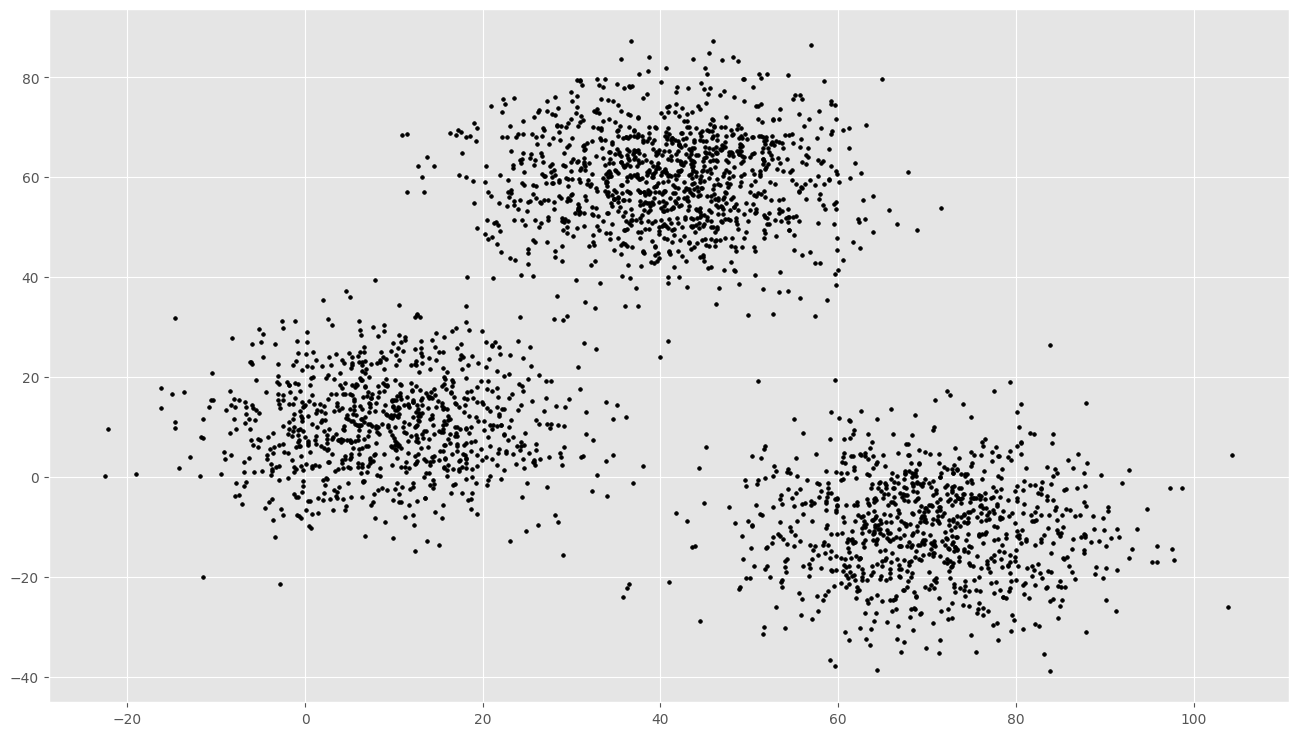

In [13]:
v1, v2 = data['V1'].values, data.V2.values
plt.scatter(v1, v2, c='k', s=7)
plt.show()

In [14]:
from sklearn.cluster import KMeans
X = np.array(list(zip(v1, v2)))
km = KMeans(n_clusters=3, n_init='auto')
km.fit(X)
y_hat = km.predict(X)
C = km.cluster_centers_

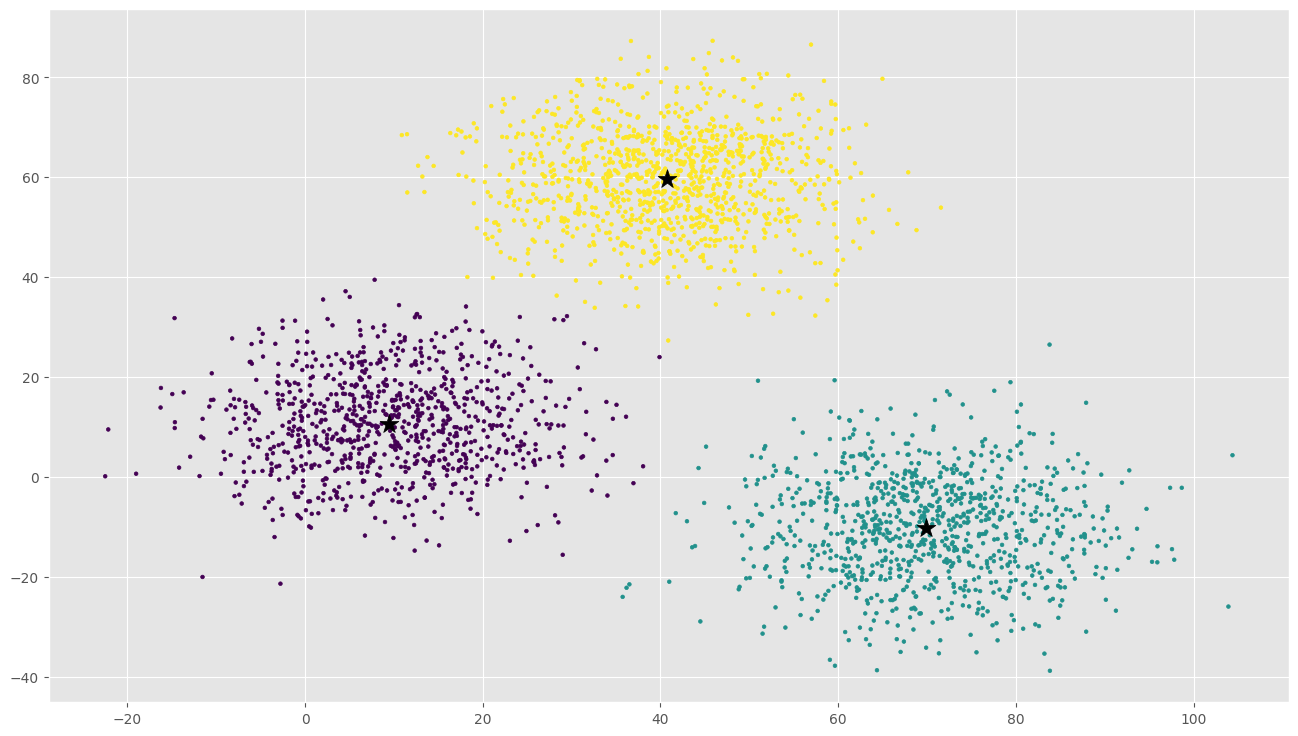

In [15]:
plt.scatter(X[:,0], X[:,1], c=y_hat, s=7)
plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='k')
plt.show()

#### Determinar número de clusters con gráfica del codo (alternativa a la gráfica de dispersión)


In [16]:
import seaborn as sns
sns.set_theme()

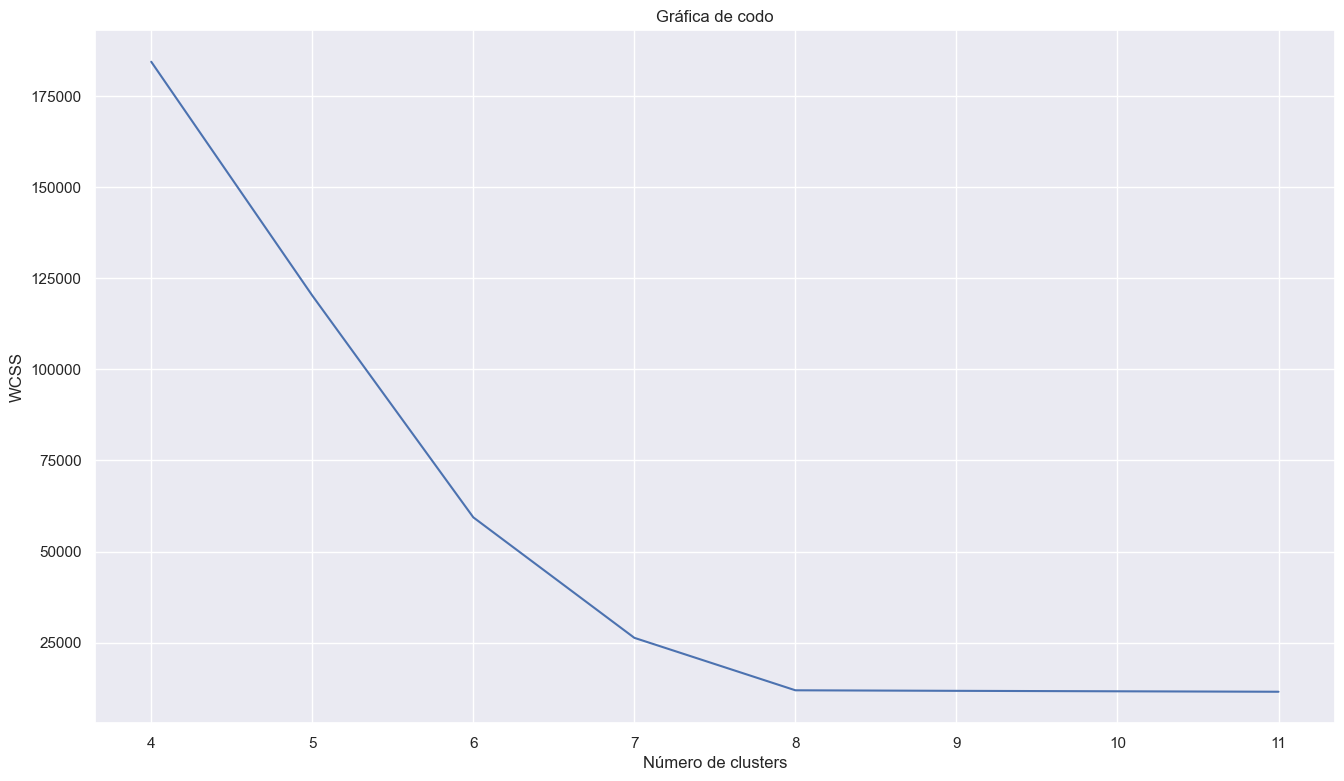

In [17]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=1000, n_features = 12, centers=8, random_state=42)
# Buscar número 'optimo' de clusters
wcss = [] # within cluster sum of squares
for i in range(4, 12):
    km = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
# Gráfica
plt.plot(range(4,12), wcss)
plt.title('Gráfica de codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

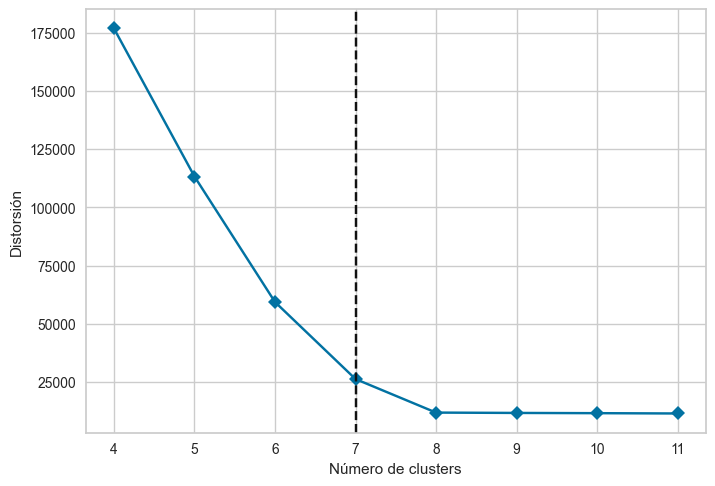

In [18]:
### Bootcamp
from yellowbrick.cluster import KElbowVisualizer
X, _ = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)
# Gráfica
vis = KElbowVisualizer(KMeans(), k=(4,12), timings=False)
vis.fit(X)
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.show()

#### Ejemplo en 3D

In [19]:
from mpl_toolkits.mplot3d import Axes3D

In [20]:
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2])

<Figure size 800x550 with 0 Axes>

In [21]:
# Objeto KMeans con 4 grupos
km = KMeans(n_clusters=4, n_init='auto')
# Ajuste
km = km.fit(X)
# Predicciones
y_hat = km.predict(X)
# Centroides
C = km.cluster_centers_
C

array([[ 2.72349556, -7.14518535,  4.91274577],
       [-7.20566869, -7.52617074, -7.08231251],
       [-8.30851768, -4.39607972,  1.09964451],
       [ 4.0582075 , -4.31203559,  5.87200448]])

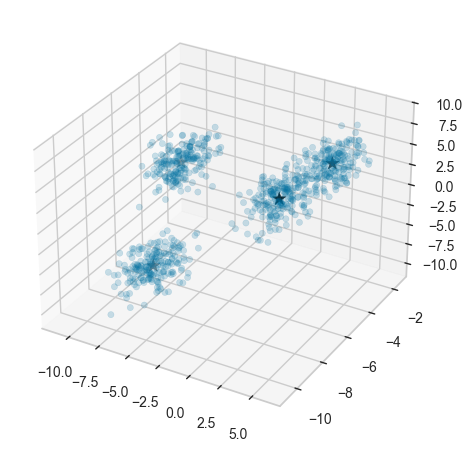

In [22]:
# Grafica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], alpha=0.2)
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', s=100, c='k')
plt.show()

### **Tarea**

Clasificar las muestras siguientes utilizando $k=2$:
$[1, 12.5], [3, 10.5], [3, 12.5], [3, 14.5], [3, 18], [5, 18], [5, 16], [5, 14.5], [5, 13], [6, 9], [8, 10], [9, 11],
[8.5, 12], [7, 13.5], [8, 16], [0.5, 10.5]$

In [23]:
data = np.array([[1, 12.5], [3, 10.5], [3, 12.5], [3, 14.5], [3, 18], [5, 18], [5, 16], [5, 14.5], [5, 13], [6, 9], [8, 10], [9, 11], [8.5, 12], [7, 13.5], [8, 16], [0.5, 10.5]])
C = np.array([[1, 12.5], [7, 13.5]])

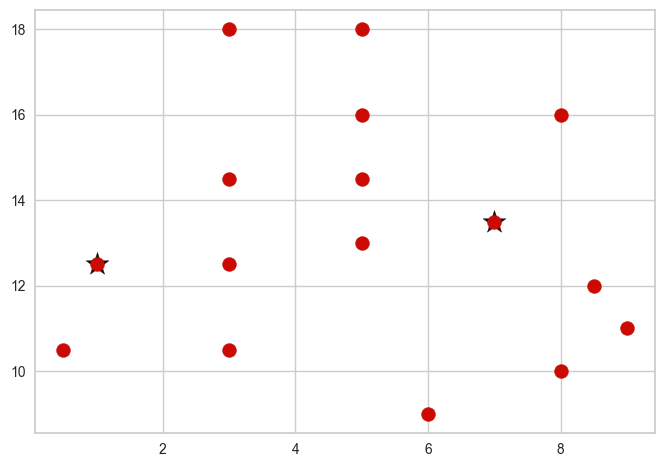

In [24]:
# Gráfica
plt.scatter(C[:,0], C[:,1], marker = '*', s = 300, c = 'k')
plt.scatter(data[:,0], data[:,1], c='r', s = 100)
plt.show()

In [25]:
distances = []
clusters = []
# Grupos
for i in range(len(data)):
    distance = dist(data[i], C) # Distancia del punto actual a las k-medias
    distances.append(distance)
    cluster = np.argmin(distance) # Grupo al que pertenece
    clusters.append(cluster)
print(clusters, '\n', np.array(distances))

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] 
 [[0.         6.08276253]
 [2.82842712 5.        ]
 [2.         4.12310563]
 [2.82842712 4.12310563]
 [5.85234996 6.02079729]
 [6.80073525 4.9244289 ]
 [5.31507291 3.20156212]
 [4.47213595 2.23606798]
 [4.03112887 2.06155281]
 [6.10327781 4.60977223]
 [7.43303437 3.64005494]
 [8.1394103  3.20156212]
 [7.51664819 2.12132034]
 [6.08276253 0.        ]
 [7.82623792 2.6925824 ]
 [2.06155281 7.15891053]]


In [26]:
# Recalcular centroides
for i in range(len(C)):
    points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
    # print(points )
    C[i] = np.mean(points, axis=0)
C

array([[ 2.25      , 13.08333333],
       [ 6.65      , 13.3       ]])

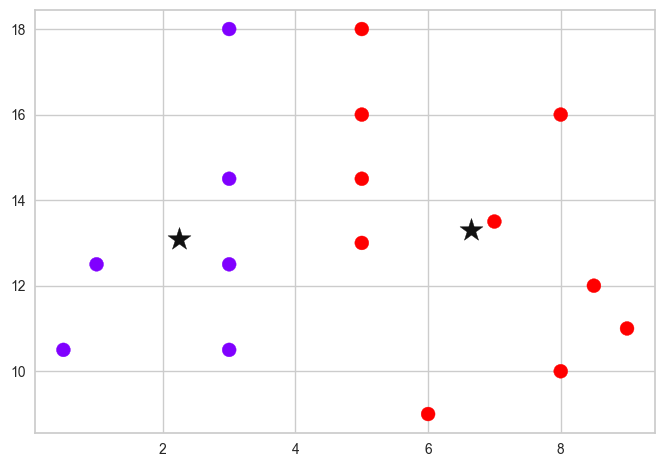

In [27]:
# Gráfica
plt.scatter(C[:,0], C[:,1], marker = '*', s = 300, c = 'k')
plt.scatter(data[:,0], data[:,1], c =clusters, s = 100, cmap='rainbow')
plt.show()

#### Con sklearn

In [28]:
kmeans = KMeans(n_clusters=2)
# Ajuste del modelo
kmeans.fit(data)
# Etiquetas de los clusters
labels = kmeans.labels_
# Centroides de los clusters
centroids = kmeans.cluster_centers_
# Mostrar los resultados
print("Etiquetas de los clusters:", labels)
print("Centroides:", centroids)

Etiquetas de los clusters: [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
Centroides: [[ 6.04166667 13.79166667]
 [ 1.875      11.5       ]]


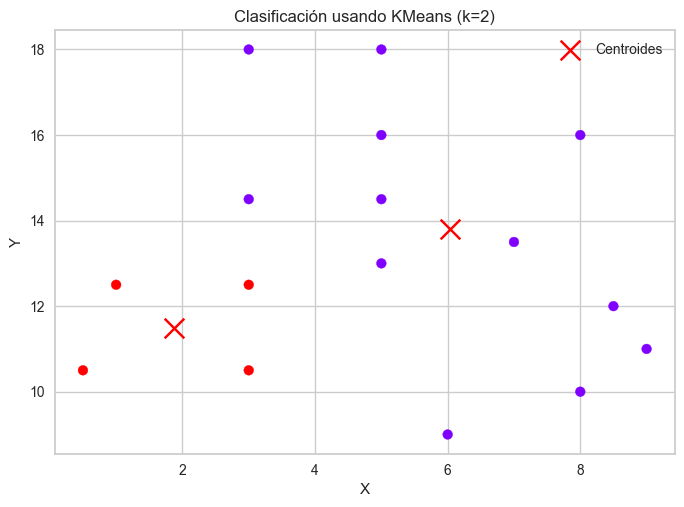

In [29]:
# Gráfica de los clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.title("Clasificación usando KMeans (k=2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### K-modas

Clasificar las muestras siguientes utilizando $k=2$:
$['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']$

In [30]:
# Datos
data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])

# Modas iniciales
modes = np.array([['x', 'y', 'z'],
                  ['z', 'y', 'x']])
data.shape

(8, 3)

In [31]:
# Asignar clusters
clusters = np.zeros(data.shape[0])
distances = []
for i, object in enumerate(data):
    dist = [sum(object != mode) for mode in modes]
    distances.append(dist)
    clusters[i] = np.argmin(dist)
print(clusters)
distances

[0. 1. 1. 0. 0. 1. 0. 1.]


[[0, 2], [3, 2], [3, 1], [2, 3], [2, 3], [2, 0], [2, 3], [2, 0]]

In [32]:
# Actualizar modas
for i in range(len(modes)):
    points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
    print(points)
    for h in range(modes.shape[1]):
        vals, counts = np.unique(points[:,h], return_counts=True)
        modes[i,h] = vals[np.argmax(counts)]
modes

[['x' 'y' 'z']
 ['y' 'z' 'z']
 ['x' 'z' 'y']
 ['x' 'x' 'y']]
[['y' 'z' 'x']
 ['z' 'x' 'x']
 ['z' 'y' 'x']
 ['z' 'y' 'x']]


array([['x', 'z', 'y'],
       ['z', 'y', 'x']], dtype='<U1')

In [33]:
from kmodes.kmodes import KModes

In [34]:
# Datos
data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])

In [35]:
# Modelo con 2 grupos
km = KModes(n_clusters=2, init='random', n_init=5, verbose=True)
grupos = km.fit_predict(data)
grupos, km.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 10.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 8.0
Run 4, iteration: 2/100, moves: 1, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 10.0
Best run was number 3


(array([0, 0, 1, 0, 0, 1, 0, 1], dtype=uint16),
 array([['x', 'z', 'y'],
        ['z', 'y', 'x']], dtype='<U1'))

Otro ejemplo

In [36]:
col_cabello = np.array(['rubio', 'castaño', 'pelirrojo', 'negro', 'castaño', 'negro', 'pelirrojo', 'rubio'])
col_ojos = np.array(['azul', 'gris', 'verde', 'café', 'azul', 'gris', 'azul', 'café'])
tipo_cabello = np.array(['lacio', 'chino', 'ondulado', 'ondulado', 'chino', 'chino', 'ondulado', 'lacio'])
personas = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':personas, 'col_cabello':col_cabello, 'col_ojos':col_ojos, 'tipo_cabello':tipo_cabello})
data = data.set_index('person')
data

,col_cabello,col_ojos,tipo_cabello
person,,,
P1,rubio,azul,lacio
P2,castaño,gris,chino
P3,pelirrojo,verde,ondulado
P4,negro,café,ondulado
P5,castaño,azul,chino
P6,negro,gris,chino
P7,pelirrojo,azul,ondulado
P8,rubio,café,lacio


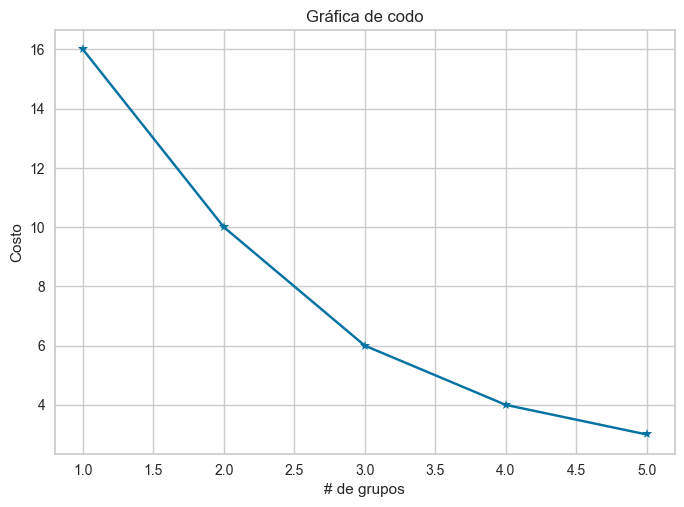

In [37]:
# Gráfica del codo
cost = []
k = range(1,6)
for nc in k:
    km = KModes(n_clusters=nc, init='random', n_init=5, verbose=False)
    km.fit_predict(data)
    cost.append(km.cost_)

plt.plot(k, cost, 'b*-')
plt.title('Gráfica de codo')
plt.xlabel('# de grupos')
plt.ylabel('Costo')
plt.show()

In [38]:
# 3 grupos
km = KModes(n_clusters=3, init='random', n_init=5, verbose=False)
grupos = km.fit_predict(data)
grupos, km.cluster_centroids_

(array([1, 2, 0, 0, 2, 2, 0, 1], dtype=uint16),
 array([['pelirrojo', 'azul', 'ondulado'],
        ['rubio', 'azul', 'lacio'],
        ['castaño', 'gris', 'chino']], dtype='<U9'))

In [39]:
data.insert(0, 'grupo', grupos)
data

,grupo,col_cabello,col_ojos,tipo_cabello
person,,,,
P1,1,rubio,azul,lacio
P2,2,castaño,gris,chino
P3,0,pelirrojo,verde,ondulado
P4,0,negro,café,ondulado
P5,2,castaño,azul,chino
P6,2,negro,gris,chino
P7,0,pelirrojo,azul,ondulado
P8,1,rubio,café,lacio


### **Tarea**

Agrega al conjunto de datos una columna continua (como estatura y/o peso) e ingresa los valores correspondientes. Después genera rangos para obtener categorías y obtén los nuevos grupos generados con esa información adicional.

In [40]:
col_cabello = np.array(['rubio', 'castaño', 'pelirrojo', 'negro', 'castaño', 'negro', 'pelirrojo', 'rubio'])
col_ojos = np.array(['azul', 'gris', 'verde', 'café', 'azul', 'gris', 'azul', 'café'])
tipo_cabello = np.array(['lacio', 'chino', 'ondulado', 'ondulado', 'chino', 'chino', 'ondulado', 'lacio'])
personas = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':personas, 'col_cabello':col_cabello, 'col_ojos':col_ojos, 'tipo_cabello':tipo_cabello})
data = data.set_index('person')
data

,col_cabello,col_ojos,tipo_cabello
person,,,
P1,rubio,azul,lacio
P2,castaño,gris,chino
P3,pelirrojo,verde,ondulado
P4,negro,café,ondulado
P5,castaño,azul,chino
P6,negro,gris,chino
P7,pelirrojo,azul,ondulado
P8,rubio,café,lacio


In [41]:
# Agregamos columna continua de estatura
estaturas = np.array([160, 175, 168, 180, 170, 165, 172, 178])
data['estatura'] = estaturas

# Creamos categorías de estatura (por rangos)
data['cat_estatura'] = pd.cut(data['estatura'], bins=[150, 165, 170, 175, 180], labels=['baja', 'media-baja', 'media', 'alta'])

# Convertir las columnas categóricas a códigos numéricos para K-Modes
data_for_kmodes = data[['col_cabello', 'col_ojos', 'tipo_cabello', 'cat_estatura']].apply(lambda x: x.astype('category').cat.codes)

# Aplicar el algoritmo K-Modes
kmodes = KModes(n_clusters=2, init='random', n_init=5, verbose=False)
clusters = kmodes.fit_predict(data_for_kmodes)

# Añadimos los clusters al DataFrame original
data['cluster'] = clusters
data

,col_cabello,col_ojos,tipo_cabello,estatura,cat_estatura,cluster
person,,,,,,
P1,rubio,azul,lacio,160,baja,1
P2,castaño,gris,chino,175,media,1
P3,pelirrojo,verde,ondulado,168,media-baja,0
P4,negro,café,ondulado,180,alta,0
P5,castaño,azul,chino,170,media-baja,1
P6,negro,gris,chino,165,baja,1
P7,pelirrojo,azul,ondulado,172,media,0
P8,rubio,café,lacio,178,alta,0


### Agrupamiento aglomerativo

In [42]:
#pandas
#numpy
#matplotlib.pyplot
url = 'https://bit.ly/2COHM14'
data = pd.read_csv(url)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [43]:
# Preprocesamiento (normalización) rango [0,1]
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


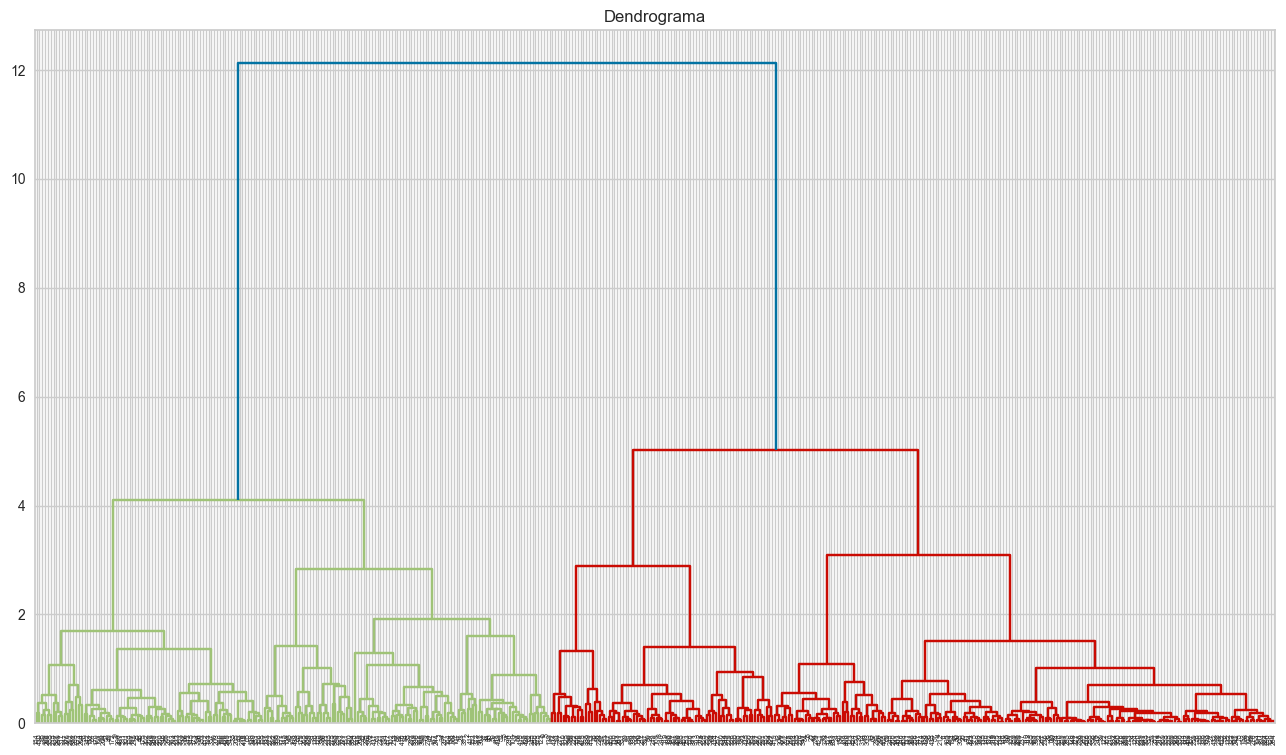

In [44]:
# Dendrograma
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16,9))
plt.title('Dendrograma')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward')) # ward minimiza la varianza

In [45]:
# 2 grupos
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward') # si usamos ward para el dendograma, debemos usarlo aquí
y_hat = ac.fit_predict(data_scaled)
y_hat

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

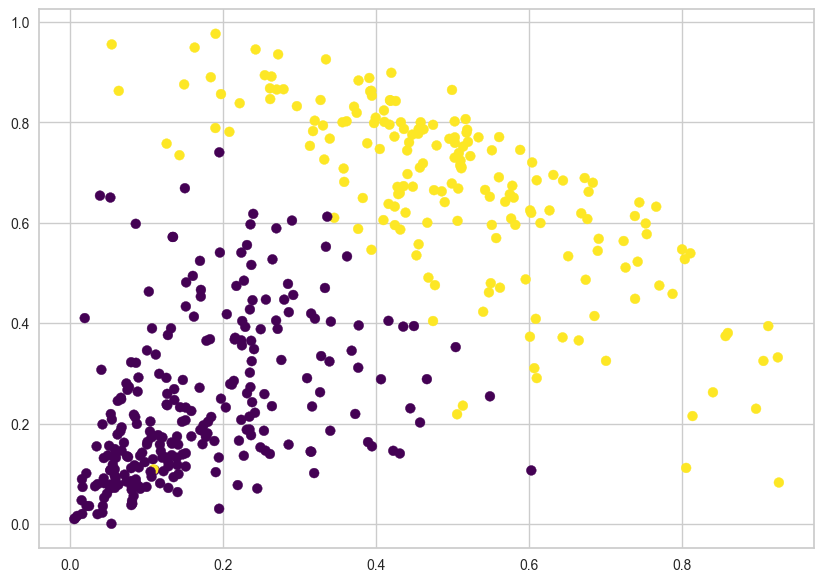

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=y_hat, s=50, cmap='viridis')
plt.show()

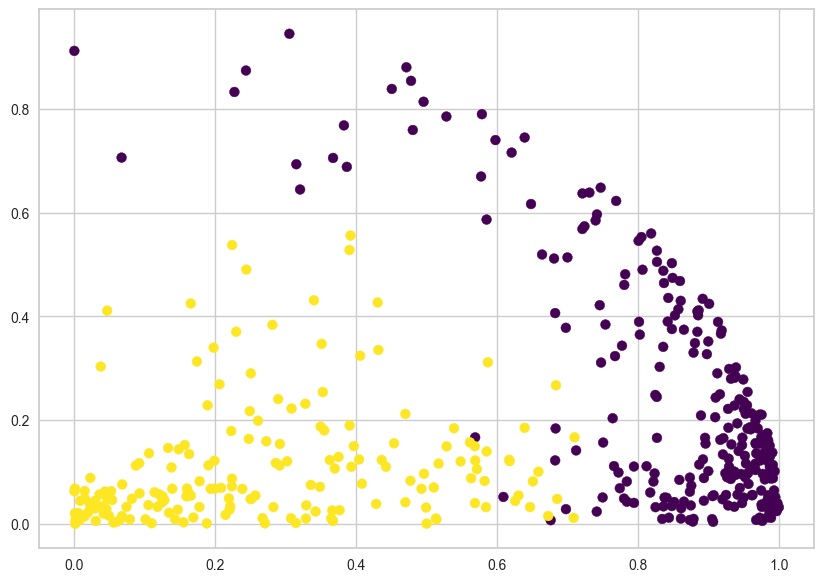

In [47]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Fresh'], data_scaled['Frozen'], c=y_hat, s=50, cmap='viridis')
plt.show()

Otro ejemplo

In [48]:
#matplotlib.pyplot
#numpy
#pandas

# Datos
dataset = pd.read_csv('https://bit.ly/3TUeh37')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


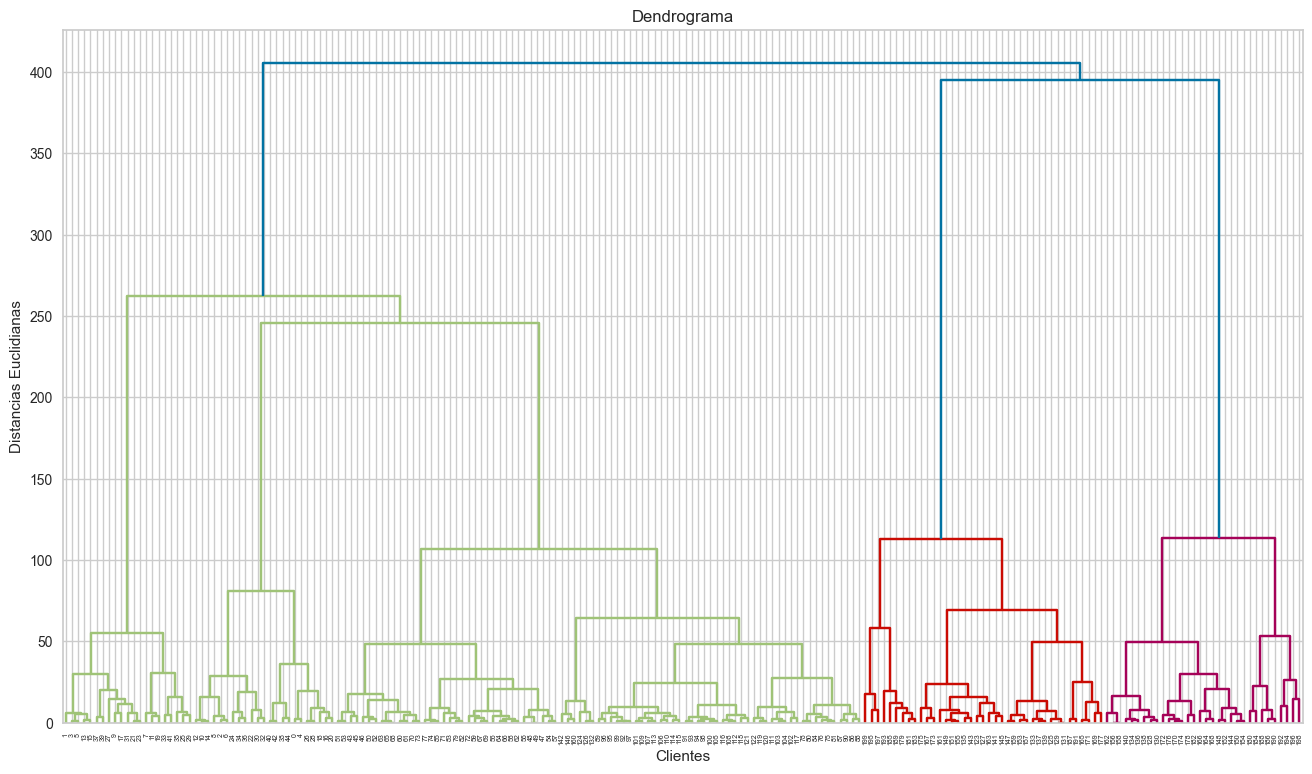

In [49]:
# Columnas de interés
X = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, 3].values
# Dendrograma
# import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,9))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [50]:
# 3 grupos
# from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hat = ac.fit_predict(X)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

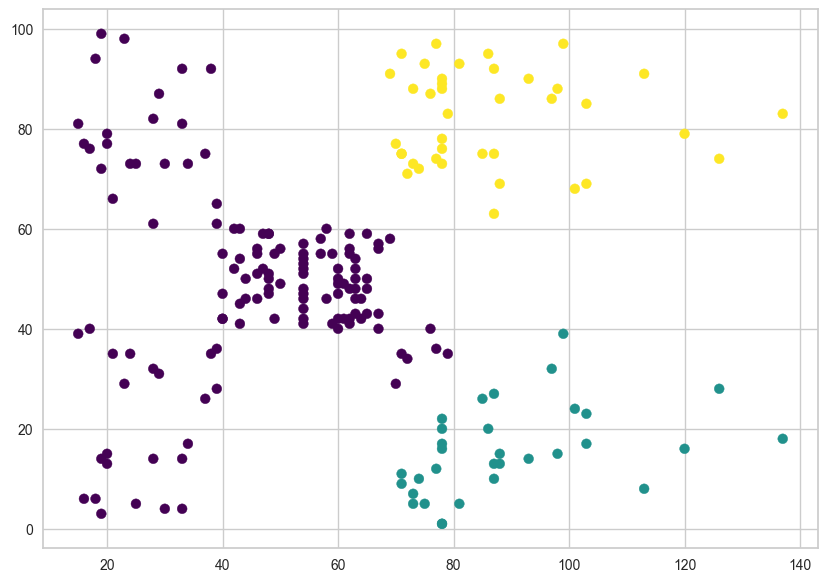

In [51]:
# Visualización
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y_hat, s=50, cmap='viridis')

In [52]:
# 5 grupos
ac = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = ac.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

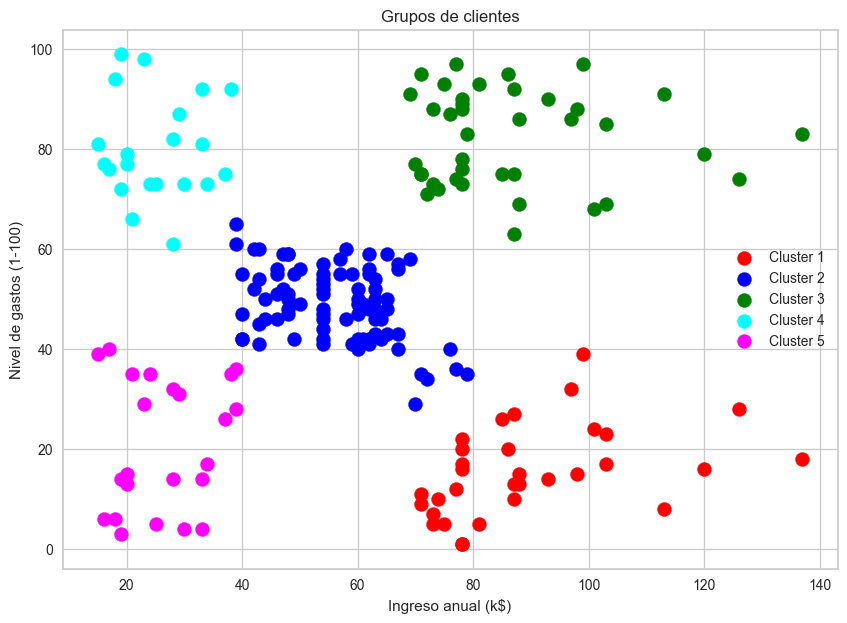

In [53]:
# Visualización
plt.figure(figsize=(10,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Grupos de clientes')
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Nivel de gastos (1-100)')
plt.legend()
plt.show()

### Agrupamiento por modelos de mezclas Gaussianas

In [54]:
#pandas
#mapltolib.pyplot
#numpy
#seaborn
sns.set_theme()

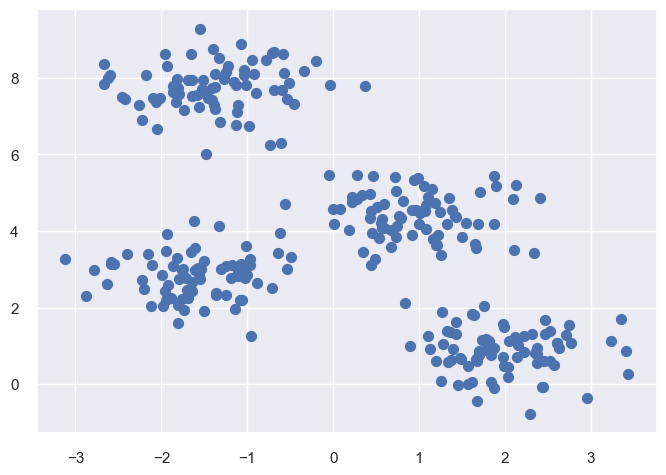

In [55]:
# Datos
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

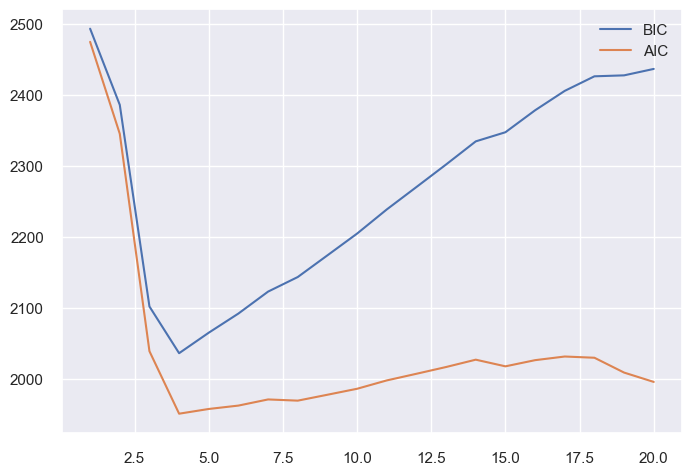

In [56]:
# Determinar numero de grupos
from sklearn.mixture import GaussianMixture
n_clusters = range(1,21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_clusters]
plt.plot(n_clusters, [m.bic(X) for m in models], label='BIC') # Criterio Bayesiano
plt.plot(n_clusters, [m.aic(X) for m in models], label='AIC') # Criterio de Información de Akaike
plt.legend(loc='best')
plt.show()

In [57]:
# Objeto GaussianMixture con 4 grupos
gmm = GaussianMixture(n_components=4)
# Ajuste
gmm.fit(X)
# Predicciones
y_hat = gmm.predict(X)
y_hat

array([1, 0, 2, 0, 1, 1, 3, 2, 0, 0, 3, 0, 2, 0, 1, 2, 2, 1, 3, 3, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 2, 3, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 0, 1, 1, 3, 0, 3, 0, 1, 0, 2, 0, 3, 3, 3,
       0, 1, 0, 3, 2, 3, 0, 3, 3, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
       0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 2, 3, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2,
       3, 3, 1, 0, 1, 2, 0, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 0, 3,
       3, 1, 0, 3, 3, 0, 2, 0, 0, 3, 2, 3, 2, 3, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 3, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 3, 2, 1, 2, 2, 0, 1, 2, 3, 0,
       1, 1, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 0, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 0, 2, 3, 1, 3, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 3, 3, 1, 1, 2,
       0, 1, 1, 3, 1, 3, 2, 0, 0, 2, 2, 0, 2, 1, 3, 2, 1, 3, 0, 3, 1, 2,
       1, 0, 0, 0, 0, 3, 3, 0, 2, 3, 1, 2, 3, 3, 3, 1, 1, 0, 2, 2, 3, 1,
       0, 3, 2, 0, 2, 1, 1, 3, 3, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1,
       0, 3, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 3])

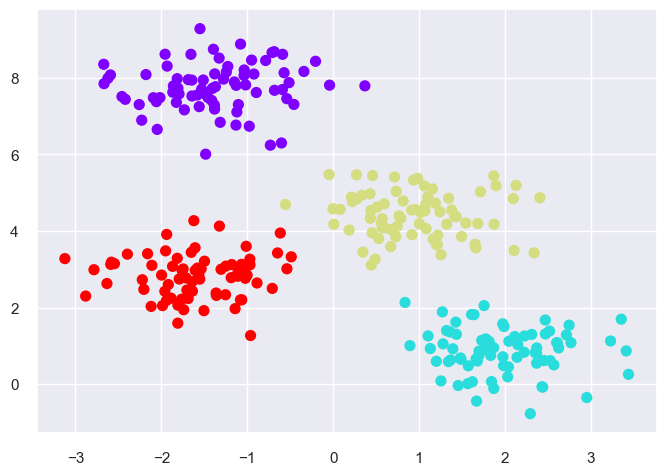

In [58]:
# Centroides
plt.scatter(X[:,0], X[:,1], c=y_hat, s=50, cmap='rainbow')
plt.show()

Otro ejemplo

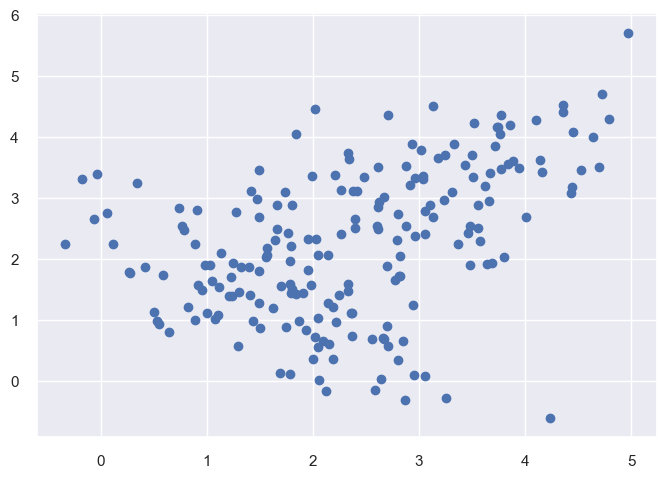

In [59]:
X_train = np.load('data.npy')
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

In [60]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)
print('Medias:\n', gmm.means_)
print('Covarianzas:\n', gmm.covariances_)

Medias:
 [[3.04181401 3.10276423]
 [1.60675817 1.35002129]]
Covarianzas:
 [[[ 0.8411194   0.38220738]
  [ 0.38220738  0.73031696]]

 [[ 0.75123214 -0.5030305 ]
  [-0.5030305   0.74333326]]]


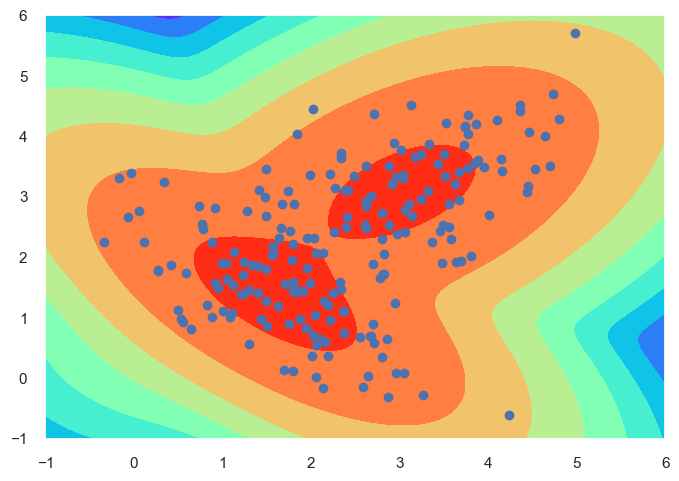

In [63]:
X, Y = np.meshgrid(np.linspace(-1,6,500), np.linspace(-1,6,500))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contourf(X, Y, Z, cmap='rainbow')
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()